## Questão 3

In [ ]:
# Utilizaremos o filtro de mediana 

from PIL import Image
import numpy as np

def filtro_de_mediana(input_path, output_path, tamanho_janela=3):
    img = Image.open(input_path)
    img = img.convert("RGB")  
    data = np.array(img)

    altura, largura, _ = data.shape
    offset = tamanho_janela // 2

    output = np.zeros_like(data)

    for y in range(offset, altura - offset):
        for x in range(offset, largura - offset):
            for c in range(3):  # Para cada canal (R, G, B)
                vizinhos = []
                for dy in range(-offset, offset + 1):
                    for dx in range(-offset, offset + 1):
                        vizinhos.append(data[y + dy, x + dx, c])

                output[y, x, c] = np.median(vizinhos)

    img_filtrada = Image.fromarray(output.astype(np.uint8))
    img_filtrada.save(output_path)  
    
filtro_de_mediana("image3.jpg", "imagem_filtrada.jpg", tamanho_janela=3)


## Questão 6

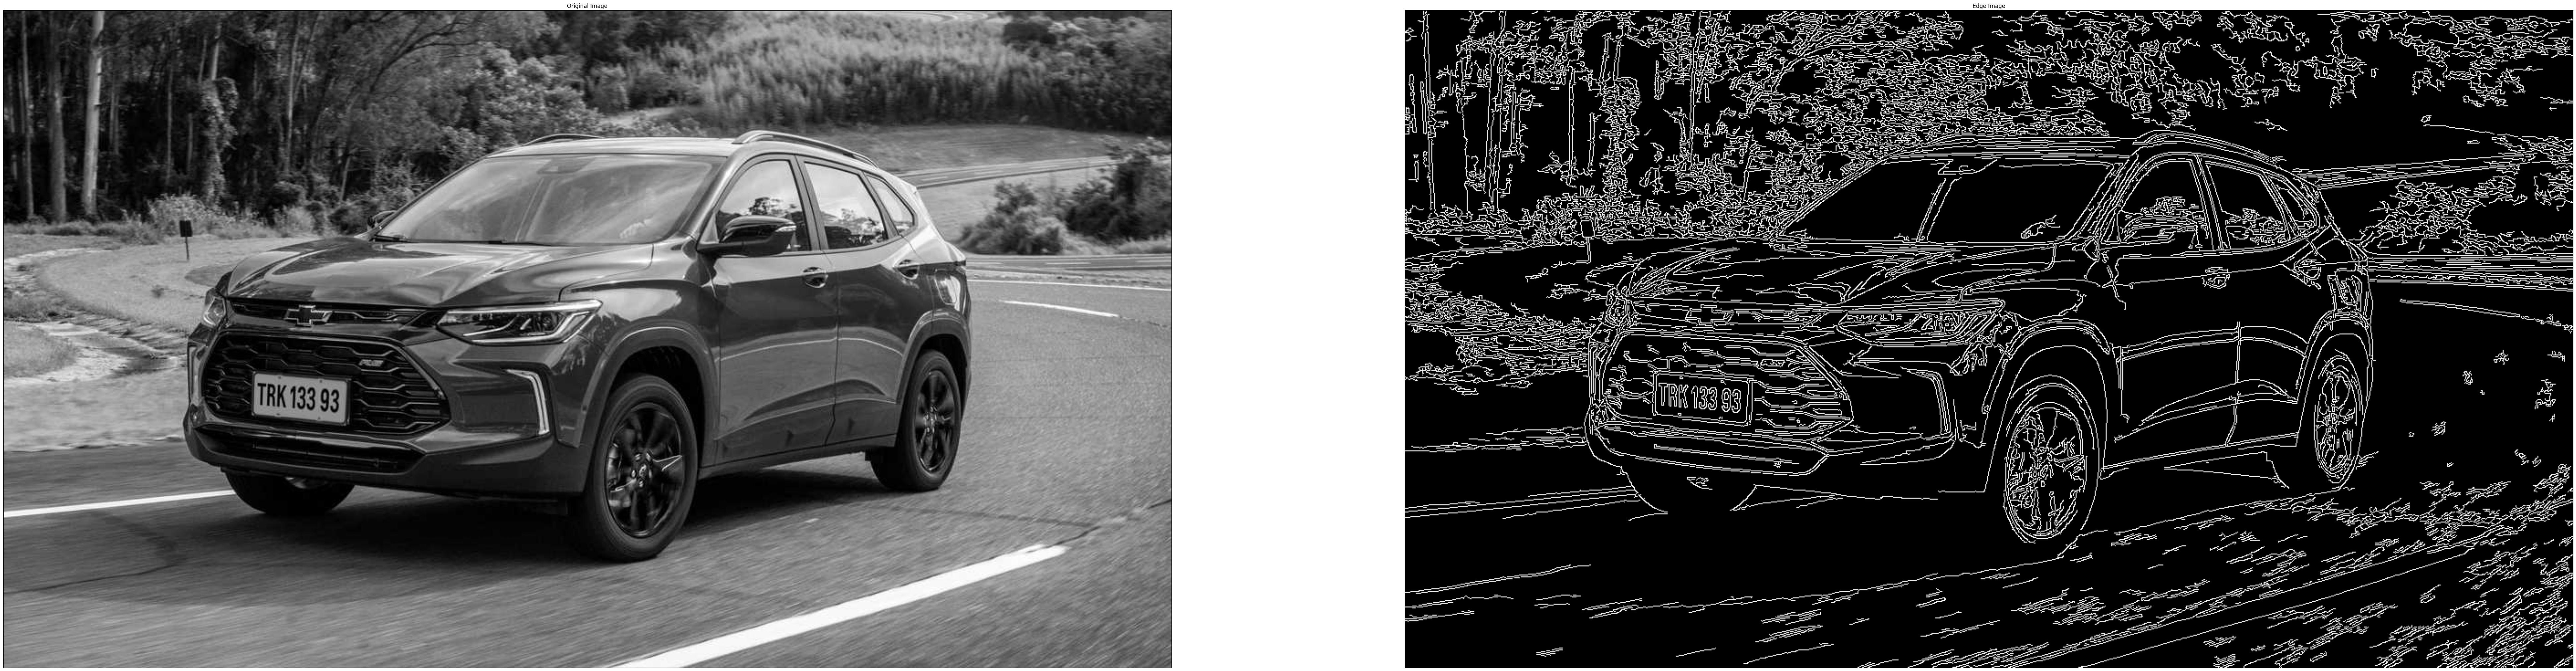

In [28]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread('image3.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
edges = cv.Canny(img,50,200, 7) #T1, T2 e tamanho do kernel 

plt.figure(figsize=(100, 50))
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

Quando nos aumentamos o valor do threshold1 e do 2, o nível de detalhes capturados da imagem diminue. Entãi uma imagem filtrada com os valores 50 e 100 apresenta muitos mais detalhes que uma filtrada com os valores 200 e 300. Isso porque estamos auterando o limite de detecção. Com valores mais baixos, mais bordas serão detectadas.

Já, olhando agora para o aperturesize(que define o tamanho do kernel de sobel) quanto mais aumentamos aparecem mais detalhes.



## Questão 8